# Instrucciones

Se trata de una tarea individual.

Responde los puntos de cada pregunta (P1: 20 puntos. P2: 20 puntos. P3: 60 puntos):

1. Sean tres puntos A = [1, 4, -3], B = [-2, 2, 1] y C = [3, -1, 4]:

    * Q se determina escalando el punto A en X, Y y Z por un factor de 1.372 y trasladándolo con las coordenadas de B.
    * Rota el punto C, 37.2° con respecto al eje Y. Toma como punto pivote al punto Q.

2. Considera una pirámide triangular regular. Su lado a = π y su altura h = 23−−√a La base de la pirámide está centrada en el punto D = (-2.345, -7.317, 1.328).

    * Encuentra todos los vértices de la pirámide.
    * Encuentra la nueva posición de cada vértice cuando la pirámide es rotada con respecto al eje Z por -23°. Usa como pivote el centroide de la pirámide (el centroide es el promedio de cada componente de cada vértice).
    
3. Implementa la solución de la Pregunta 2 usando la librería gráfica que indique tu instructor (OpenGL, Unity, Unreal, WebGL)

    * Utiliza el equivalente a transformaciones homogéneas para obtener el resultado. Es decir, no es válido trasladar hacia el resultado final.
    * Tampoco es válido usar funciones predefinidas para transladar y rotar. En su lugar, implementa tus propias funciones de multiplicación homogénea y dibuja líneas al final del proceso, usando los puntos obtenidos.
    * Verifica que el resultado teórico corresponda con el resultado de la ejecución del programa.
    
###### David Josué Marcial Quero
###### A00828702

In [1]:
!pip3 install numpy
!pip3 install matplotlib

In [2]:
# Numpy para cálculos con álgebra lineal
import numpy as np
import math 

In [3]:
A = np.array([1, 4, -3])
B = np.array([-2, 2, 1])
C = np.array([3, -1, 4])

### 1. Escala de punto A en X,Y,Z por un factor de 1.372

In [4]:
def scaleMatrix(vector):
  return np.diag([*vector, 1])

# Get the new point
A = np.array([1, 4, -3, 1])
Q0 = np.array([1.372, 1.372, 1.372])
Q1 = np.matmul(scaleMatrix(Q0), A)
print('from {} to {}'.format(A, Q1))

from [ 1  4 -3  1] to [ 1.372  5.488 -4.116  1.   ]


### 1. Trasladar A con las coordenadas de B

In [5]:
def translationMatrix(vector):
  matrix = np.identity(len(vector) + 1)
  matrix[-1,:-1] = vector
  return matrix.T

print(translationMatrix(B))

# Get the new point
Q2 = np.matmul(translationMatrix(B), Q1)
print('from {} to {}'.format(Q1, Q2))

[[ 1.  0.  0. -2.]
 [ 0.  1.  0.  2.]
 [ 0.  0.  1.  1.]
 [ 0.  0.  0.  1.]]
from [ 1.372  5.488 -4.116  1.   ] to [-0.628  7.488 -3.116  1.   ]


### 1. Rota el punto C, 37.2° con respecto al eje Y. Toma como punto pivote al punto Q

[[ 0.79652992  0.         -0.60459911  0.        ]
 [ 0.          1.          0.          0.        ]
 [ 0.60459911  0.          0.79652992  0.        ]
 [ 0.          0.          0.          1.        ]]
Translated point to origin [ 3.628 -8.488  7.116  1.   ]
Rotate with pivot [-1.41251676 -8.488       7.86159249  1.        ]
Translated point [-2.04051676 -1.          4.74559249  1.        ]
Translated point to origin [-1.41251676 -8.488       7.86159249  1.        ]
Rotate with pivot [-5.87822372 -8.488       5.40798724  1.        ]
Translated point [-6.50622372 -1.          2.29198724  1.        ]
Translated point to origin [-5.87822372 -8.488       5.40798724  1.        ]
Rotate with pivot [-7.95184535 -8.488       0.75365477  1.        ]
Translated point [-8.57984535 -1.         -2.36234523  1.        ]
Translated point to origin [-7.95184535 -8.488       0.75365477  1.        ]
Rotate with pivot [-6.78954173 -8.488      -4.20737009  1.        ]
Translated point [-7.41754173 -1. 

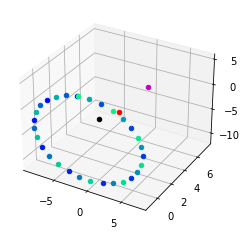

In [6]:
import matplotlib.pyplot as plt
def rotationMatrix(angle_degrees, axis='x', dim=3):
  angle = np.deg2rad(angle_degrees)
  ii = np.cos(angle)
  ji = np.sin(angle)
  matrix = np.identity(dim + 1)
  if axis == 'z':
    matrix[0, 0] = ii
    matrix[1, 1] = ii
    matrix[0, 1] = -ji
    matrix[1, 0] = ji
  elif axis == 'y':
    matrix[0, 0] = ii
    matrix[2, 2] = ii
    matrix[0, 2] = -ji
    matrix[2, 0] = ji
  else:
    matrix[1, 1] = ii
    matrix[2, 2] = ii
    matrix[1, 2] = -ji
    matrix[2, 1] = ji
  return matrix

print(rotationMatrix(37.2, 'y'))

C = C = np.array([3, -1, 4, 1])
pivot = Q2[:3]
traM = translationMatrix(pivot)
rotM = rotationMatrix(37.2, 'y')

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

plt.ion()
ax.scatter(0, 0, 0, c='k')
ax.scatter(*pivot, c='m')
ax.scatter(*Q0[:-1], c='r')

Qaux = C
for color in plt.cm.winter(np.linspace(0, 1, 30)):
    # Translate from a point to the origin
    Qaux = np.matmul(np.linalg.inv(traM), Qaux)
    print("Translated point to origin", Qaux)

    # Rotate
    Qaux = np.matmul(rotM, Qaux)
    print("Rotate with pivot", Qaux)

    # Translate from a point to the origin
    Qaux = np.matmul(traM, Qaux)
    print("Translated point", Qaux)

    ax.scatter(*Qaux[:-1], color=color) 

plt.show()

## 2. Considera una pirámide triangular regular. Su lado a = π y su altura h = √((2/3)a) La base de la pirámide está centrada en el punto D = (-2.345, -7.317, 1.328). 

### Encuentra todos los vértices de la pirámide.

In [7]:
#Encontrar la distancia entre la vertice y el punto central, es decir, el lado "a" de un tríangulo isócesles
#que tiene como base uno de los lados del triángulo equilatero (pi).
#La fórmula es a = sqrt(b^2/((1-cos 120)/2))
# Cos 120 = -0.5
b = math.sqrt((math.pi**2/(1+0.5))/2)
print(b)

1.8137993642342178


In [8]:
# Trasladando el punto central la distancia "b" para obtener uno de los vertices de la base del triángulo

# Get the new point
distance = np.array([0, -b, 0])
D = np.array([-2.345, -7.317, 1.328, 1])
V1 = np.matmul(translationMatrix(distance), D)
print('from {} to {}'.format(D, V1))

from [-2.345 -7.317  1.328  1.   ] to [-2.345      -9.13079936  1.328       1.        ]


In [9]:
# Para encontrar las otras vertices del triángulo equilatero, simplemente rotamos el primer vertice
# respecto al eje Z con D como pivote

pivot = D[:3]
traM = translationMatrix(pivot)
rotM = rotationMatrix(120, 'z')

Qaux2 = V1

# Translate from a point to the origin
Qaux2 = np.matmul(np.linalg.inv(traM), Qaux2)
print("Translated point to origin", Qaux2)

# Rotate
Qaux2 = np.matmul(rotM, Qaux2)
print("Rotate with pivot", Qaux2)

# Translate from a point to the origin
V2 = np.matmul(traM, Qaux2)
print("Vertice 2", V2)

Qaux3 = V2

# Translate from a point to the origin
Qaux3 = np.matmul(np.linalg.inv(traM), Qaux3)
print("Translated point to origin", Qaux3)

# Rotate
Qaux3 = np.matmul(rotM, Qaux3)
print("Rotate with pivot", Qaux3)

# Translate from a point to the origin
V3 = np.matmul(traM, Qaux3)
print("Vertice3", V3)
 

Translated point to origin [ 0.         -1.81379936  0.          1.        ]
Rotate with pivot [1.57079633 0.90689968 0.         1.        ]
Vertice 2 [-0.77420367 -6.41010032  1.328       1.        ]
Translated point to origin [1.57079633 0.90689968 0.         1.        ]
Rotate with pivot [-1.57079633  0.90689968  0.          1.        ]
Vertice3 [-3.91579633 -6.41010032  1.328       1.        ]


In [10]:
# Para obtener el último vértice simplemente trasladamos el punto central la distancia "h" en el eje Z
# Get the new point
h = math.sqrt((2/3)*math.pi)
h_distance = np.array([0, 0, h])
V4 = np.matmul(translationMatrix(h_distance), D)
print('from {} to {}'.format(D, V4))

from [-2.345 -7.317  1.328  1.   ] to [-2.345      -7.317       2.77520251  1.        ]


### Encuentra la nueva posición de cada vértice cuando la pirámide es rotada con respecto al eje Z por -23°. Usa como pivote el centroide de la pirámide (el centroide es el promedio de cada componente de cada vértice).

In [11]:
# El centroide se encuentra a una distancia de la base igual a: (1/4)*h
centroide_distance = (1/4)*h
centroide_vec = h_distance = np.array([0, 0, centroide_distance])
centroide_coor = np.matmul(translationMatrix(centroide_vec), D)
print(centroide_coor)

pivot = centroide_coor[:3]
traM = translationMatrix(pivot)
rotM = rotationMatrix(-23, 'z')

Qaux_V1 = V1

# Translate from a point to the origin
Qaux_V1 = np.matmul(np.linalg.inv(traM), Qaux_V1)
print("Translated point to origin", Qaux_V1)

# Rotate
Qaux_V1 = np.matmul(rotM, Qaux_V1)
print("Rotate with pivot", Qaux_V1)

# Translate from a point to the origin
V1_Rotated = np.matmul(traM, Qaux_V1)
print("V1 rotated", V1_Rotated)

Qaux_V2 = V2

# Translate from a point to the origin
Qaux_V2 = np.matmul(np.linalg.inv(traM), Qaux_V2)
print("Translated point to origin", Qaux_V2)

# Rotate
Qaux_V2 = np.matmul(rotM, Qaux_V2)
print("Rotate with pivot", Qaux_V2)

# Translate from a point to the origin
V2_Rotated = np.matmul(traM, Qaux_V2)
print("V2 rotated", V2_Rotated)

Qaux_V3 = V3

# Translate from a point to the origin
Qaux_V3 = np.matmul(np.linalg.inv(traM), Qaux_V3)
print("Translated point to origin", Qaux_V3)

# Rotate
Qaux_V3 = np.matmul(rotM, Qaux_V3)
print("Rotate with pivot", Qaux_V3)

# Translate from a point to the origin
V3_Rotated = np.matmul(traM, Qaux_V3)
print("V3 rotated", V3_Rotated)

# El último vértice queda igual al ser rotado


[-2.345      -7.317       1.68980063  1.        ]
Translated point to origin [ 0.         -1.81379936 -0.36180063  1.        ]
Rotate with pivot [-0.70870787 -1.66961112 -0.36180063  1.        ]
V1 rotated [-3.05370787 -8.98661112  1.328       1.        ]
Translated point to origin [ 1.57079633  0.90689968 -0.36180063  1.        ]
Rotate with pivot [ 1.80027958  0.22104654 -0.36180063  1.        ]
V2 rotated [-0.54472042 -7.09595346  1.328       1.        ]
Translated point to origin [-1.57079633  0.90689968 -0.36180063  1.        ]
Rotate with pivot [-1.09157171  1.44856458 -0.36180063  1.        ]
V3 rotated [-3.43657171 -5.86843542  1.328       1.        ]
